In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path('/content/drive/MyDrive/ML/ML_Titanic')

# Klasyfikacja pasażerów Titanica
Po wysłaniu raportu pozostało już tylko czekać. Dni mijały, ale w końcu telefon zadzwonił. Okazało się, że po konsultacji Twojego raportu z najbardziej doświadczonymi specjalistami w dziedzinie, zleceniodawca zdecydował się powierzyć Ci dalszą część tajemniczego zadania. Chodzi oczywiście o... **stworzenie modelu przewidującego szanse przeżycia katastrofy Titanica**.

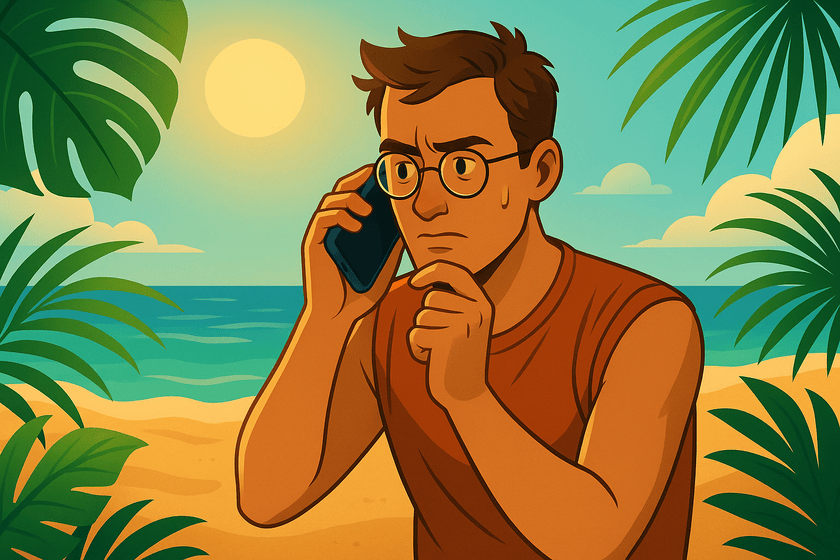

(*AI-generated image*)


#### Twoim celem będzie jest wytrenowanie modeli do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

Poniżej znajdziesz pytania, które mogą być pomocne w zadaniu:

- Czego nauczyło Cię o badanym zbiorze danych poprzednie zadanie? Jak możesz wykorzystać wyciągnięte z niego wnioski w procesie tworzenia modelu?
- Jak przeprowadzenie standaryzacji danych może wpływać na zachowanie modelu?
- Co mój model robi i w jaki sposób?
- Jak nie przetrenować wybranego modelu?
- Jaki wynik klasyfikacji możemy uznać za *dobry*?


Wymagania:
- Wypisz obserwacje z pierwszego zadania, które pomogą Ci w tym. Co było przydatne, a co okazało się bezużyteczne?
- [Nie doprowadź](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do ~~przecieku statku~~ wycieku danych (np. nie ucz modelu na danych testowych). Nauczone modele odpal na danych treningowych i testowych - opisz uzyskane wyniki.
- Stwórz baseline, czyli dla porównania sprawdź jak z zadaniem radzi sobie [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) (jeśli Twój docelowy model radzi sobie gorzej - uciekaj)
- Przeprowadź badania na dwóch wybranych modelach uczenia maszynowego (np. spośród: drzew decyzyjnych, SVM, MLP, KNN, z gwiazdką [XGBoost](https://xgboost.readthedocs.io/en/stable))
- W badaniach użyj wybranych metryk. Wybór uzasadnij.
- Dla każdego modelu wybierz co najmniej dwa hiperparametry i przeprowadź badania zależności wyników metryk od wartości hiperparametrów. Zwizualizuj wszystko ładnie, zastanów się dlaczego tak mogło być i wyciągnij i wypisz wnioski.
- Podsumuj przeprowadzone badania, wypisz wnioski.

Niezmiennie, zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Jeśli chcesz, możesz sprawdzić (przyjmując pewne założenia), jakie byłyby Twoje szanse na Titanicu.

Uwaga! Jeśli Titanic to dla Ciebie nic i baaaaardzo chcesz to możesz w ramach tego zadania zająć się [bardziej wymagającym](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data) zbiorem.

In [192]:
titanic_df = pd.read_csv(base_path / 'titanic_cleaned.csv')

# 0. Wprowadzenie

## 0.0 Analiza wyników z EDA w kontekście tworzenia modelu

W poprzednim zadaniu została już przeprowadzona analiza danych, uzupełnienie braków oraz przekodowanie wartości kategorialnych na numeryczne. \\
Można było zauważyć w nim, że cechy `Sex` i `Pclass` były bardzo silnie związane z przeżyciem -> spodziewamy się, że modele je podchwycą. \\
Na kategorii `Fare` przeprowadzona została już transformacja logarytmiczna, w tym etapie modelowania pracujemy na już przekształconej wersji cechy `Fare`.

# 1. Podział danych na treningowe i testowe

Dane zostały podzielone na:
* 80% treningowe
* 20% testowe

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23)

Podzieliliśmy dane. Dzięki użyciu `stratify=y` zarówno w zbiorze treningowym, jak i testowym mamy podobny rozkład kategprii. `random_state=23` sprawia, że podział jest powtarzalny.
Oznacza to, że za każdym razem, gdy wykonamy podział danych z tym samym random_state=23, uzyskamy identyczny podział. Teraz sprawdźmy jak to wygląda

In [195]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,HasCabin,Fare_log
541,3,1,9.0,4,2,31.2750,3,0,0,3.474293
306,1,1,28.0,0,0,110.8833,1,1,0,4.717456
454,3,2,28.0,0,0,8.0500,3,1,0,2.202765
199,2,1,24.0,0,0,13.0000,3,1,0,2.639057
397,2,2,46.0,0,0,26.0000,3,1,0,3.295837
...,...,...,...,...,...,...,...,...,...,...
51,3,2,21.0,0,0,7.8000,3,1,0,2.174752
590,3,2,35.0,0,0,7.1250,3,1,0,2.094946
41,2,1,27.0,1,0,21.0000,3,0,0,3.091042
23,1,2,28.0,0,0,35.5000,3,1,1,3.597312


In [196]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,HasCabin,Fare_log
136,1,1,19.0,0,2,26.2833,3,0,1,3.306275
868,3,2,28.0,0,0,9.5000,3,1,0,2.351375
13,3,2,39.0,1,5,31.2750,3,0,0,3.474293
4,3,2,35.0,0,0,8.0500,3,1,0,2.202765
206,3,2,32.0,1,0,15.8500,3,0,0,2.824351
...,...,...,...,...,...,...,...,...,...,...
172,3,1,1.0,1,1,11.1333,3,0,0,2.495954
847,3,2,35.0,0,0,7.8958,1,1,0,2.185579
87,3,2,28.0,0,0,8.0500,3,1,0,2.202765
145,2,2,19.0,1,1,36.7500,3,0,0,3.630985


In [197]:
y_train

,Survived
541,0
306,1
454,0
199,0
397,0
...,...
51,0
590,0
41,0
23,1


In [198]:
y_test

,Survived
136,1
868,0
13,0
4,0
206,0
...,...
172,1
847,0
87,0
145,0


# 2. Dummy Classifier

In [199]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report

Stwórzmy `Dummy Classifier` - model służący nam jako punkt odniesienia

In [200]:
model = DummyClassifier(strategy = 'uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.63      0.54      0.58       110
           1       0.40      0.49      0.44        69

    accuracy                           0.52       179
   macro avg       0.51      0.51      0.51       179
weighted avg       0.54      0.52      0.53       179



array([[59, 51],
       [35, 34]])

Dokładność to około 50%. Porówamy to w późniejszym etapie z dokładnością naszego modelu.

# 3. Badania na modelach uczenia maszynowego

## 3.0 Drzewo decyzyjne

In [201]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

Stwórzmy najpierw przykładowe drzewo decyzyjne i sprawdźmy jego dokładność:

In [202]:
model = DecisionTreeClassifier(max_depth=3, random_state=23)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



array([[95, 15],
       [22, 47]])

Widzimy, że dokładność to około 70%-80%. Zobaczmy teraz jak wygląda samo drzewo

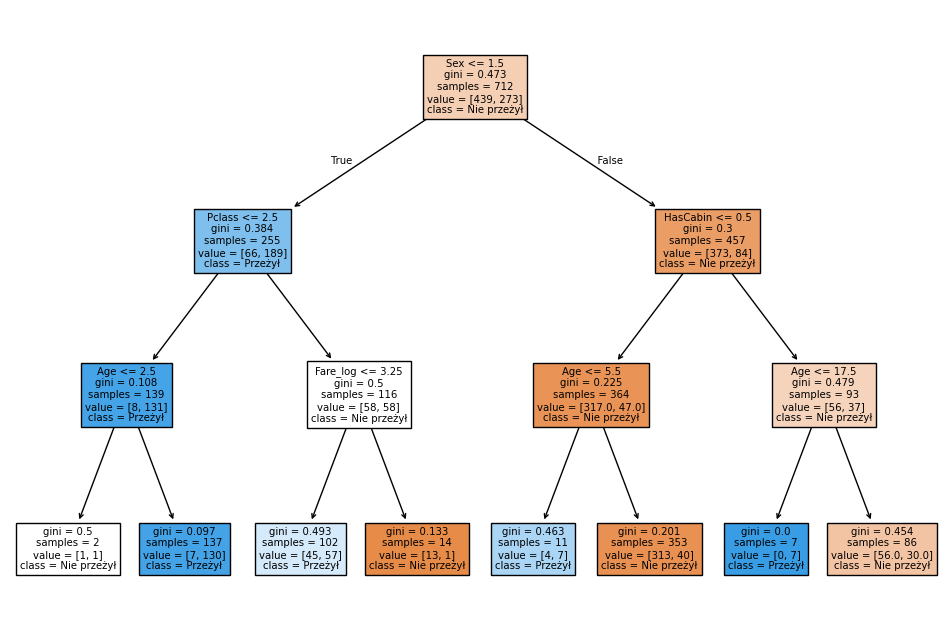

In [203]:
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['Nie przeżył', 'Przeżył'])
plt.show()

Zbadajmy dokładność w zależności od hiperparametrów `max_depth` i `min_samples_split`

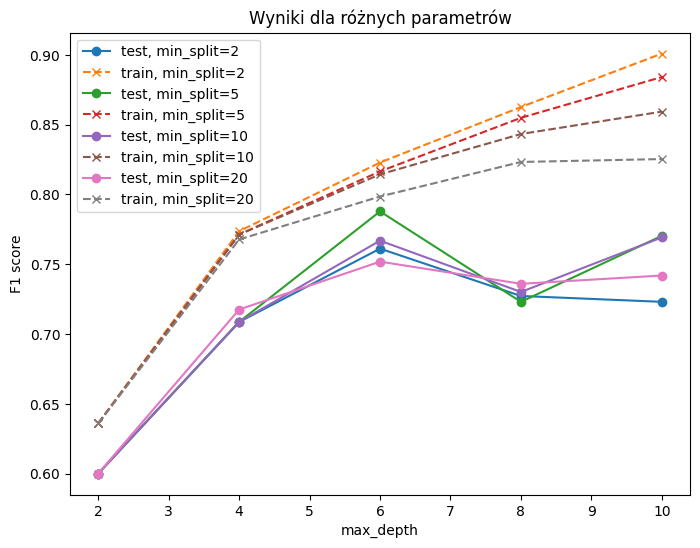

In [209]:
depths = [2, 4, 6, 8, 10]
min_splits = [2, 5, 10, 20]

results_tree = []

for depth in depths:
    for min_split in min_splits:
        clf = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_split=min_split,
            random_state=23
        )
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        acc_train = accuracy_score(y_train, y_train_pred)
        acc_test = accuracy_score(y_test, y_test_pred)
        f1_train = f1_score(y_train, y_train_pred)
        f1_test = f1_score(y_test, y_test_pred)

        results_tree.append({
            "max_depth": depth,
            "min_samples_split": min_split,
            "acc_train": acc_train,
            "acc_test": acc_test,
            "f1_train": f1_train,
            "f1_test": f1_test
        })

df_tree = pd.DataFrame(results_tree)

plt.figure(figsize=(8,6))
for min_split in min_splits:
    subset = df_tree[df_tree["min_samples_split"] == min_split]
    plt.plot(subset["max_depth"], subset["f1_test"], marker="o", label=f"test, min_split={min_split}")
    plt.plot(subset["max_depth"], subset["f1_train"], linestyle="--", marker="x", label=f"train, min_split={min_split}")

plt.title("Wyniki dla różnych parametrów")
plt.xlabel("max_depth")
plt.ylabel("F1 score")
plt.legend()
plt.show()

Zwiększanie głębokości drzewa z 2 do 5 poprawia jakość klasyfikacji. Minimalna liczba próbek do podziału wpływa mniej, ale wartość około 5 daje lepsze wyniki.

## 3.1 SVM

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

W SVM badanymi hiperparametrami będą `C` i `gamma`.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Najlepsze parametry: {'clf__C': 1, 'clf__gamma': 'scale'}
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

[[101   9]
 [ 22  47]]


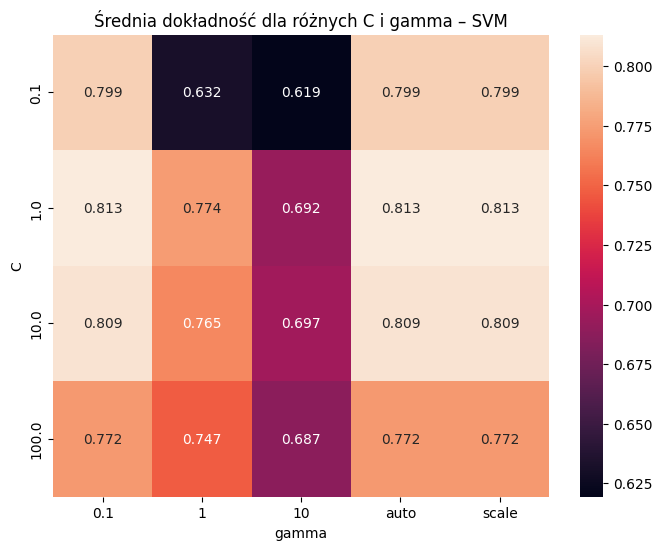

In [206]:
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(), num_cols)],
    remainder="passthrough"
)

svm_pipe = Pipeline([
    ("prep", preprocess),
    ("clf", SVC(kernel='rbf', random_state=23))
])

param_grid = {
    "clf__C": [0.1, 1, 10, 100],
    "clf__gamma": ["scale", "auto", 0.1, 1, 10]
}

grid_search = GridSearchCV(svm_pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Najlepsze parametry:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cvres = pd.DataFrame(grid_search.cv_results_)
pivot_table = cvres.pivot(index="param_clf__C",
                          columns="param_clf__gamma",
                          values="mean_test_score")

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f")
plt.title('Średnia dokładność dla różnych C i gamma – SVM')
plt.ylabel('C')
plt.xlabel('gamma')
plt.show()

Jak widać, najlepsze wyniki uzyskujemy z `C` = 1. Jeśli chodzi o `gamma` - dokładność dla 0.1, auto i scale jest porównywalna, ale zdecydowanie najgorzej wypada 10.

# 5. Wnioski

Wyniki z moich modelów osiągały dokładność około 70%-80%. Dummy Classifier miał jedynie 50%. Jest to różnica wystarczająca, aby stwierdzić, że badania przebiegły pomyślnie. Osiągnięta dokładność nie wskazuje też na żaden wyciek danych.